# 7. Mạng Nơ-ron Tích chập Hiện đại
Những mô hình hiện đại gồm có: *AlexNet*, mạng quy mô lớn đầu tiên được triển khai để đánh bại các phương pháp thị giác máy tính truyền thống trong một thử thách quy mô lớn; *VGG*, mạng tận dụng một số lượng các khối được lặp đi lặp lại; Mạng trong Mạng (*Network in Network - NiN*), một kiến trúc nhằm di chuyển toàn bộ mạng nơ-ron theo từng điểm ảnh ở đầu vào; *GoogLeNet* sử dụng các phép nối song song giữa các mạng; Mạng phần dư (*residual networks - ResNet*) là kiến trúc mạng được sử dụng phổ biến nhất hiện nay; và cuối cùng là Mạng tích chập kết nối dày đặc (*densely connected network - DenseNet*), dù yêu cầu khối lượng tính toán lớn nhưng thường được sử dụng làm mốc chuẩn trong thời gian gần đây.

## 7.1. Mạng Nơ-ron Tích chập Sâu (AlexNet)
Mặc dù đã trở nên nổi tiếng trong cộng đồng thị giác máy tính và học máy sau khi LeNet được giới thiệu, mạng nơ-ron tích chập chưa lập tức thống trị lĩnh vực này. Dẫu LeNet đã đạt được kết quả tốt trên những tập dữ liệu nhỏ, chất lượng và tính khả thi của việc huấn luyện mạng tích chập trên một tập dữ liệu lớn và sát thực tế hơn vẫn là một câu hỏi. Trên thực tế, hầu hết trong khoảng thời gian từ đầu những năm 1990 cho tới năm 2012 với những thành tựu mang tính bước ngoặt, mạng nơ-ron tích chập thường không sánh bằng những phương pháp học máy khác, như Máy Vector hỗ trợ - SVM.

Với thị giác máy tính, phép so sánh này dường như không công bằng. Nguyên nhân là do giá trị đầu vào của mạng tích chập chỉ bao gồm giá trị điểm ảnh thô hoặc đã xử lý thô (như định tâm ảnh (centering)), và kinh nghiệm cho thấy những giá trị thô này không bao giờ nên dùng trực tiếp trong các mô hình truyền thống. Thay vào đó, các hệ thống thị giác máy tính cổ điển dùng những pipeline trích xuất đặc trưng một cách thủ công. Thay vì được học, các đặc trưng được tạo thủ công. Hầu hết những tiến triển trong ngành đều đến từ các ý tưởng thông minh hơn trong tạo đặc trưng và ít để ý hơn tới thuật toán học.

Mặc dù cũng đã có các thiết bị phần cứng tăng tốc độ thực thi mạng nơ-ron vào đầu những năm 1990, chúng vẫn chưa đủ mạnh để triển khai những mạng nơ-ron nhiều kênh, nhiều tầng với số lượng tham số lớn. Ngoài ra, những tập dữ liệu vẫn còn tương đối nhỏ. Thêm vào đó, những thủ thuật chính để huấn luyện mạng nơ-ron bao gồm khởi tạo tham số dựa trên thực nghiệm, các biến thể tốt hơn của hạ gradient ngẫu nhiên, hàm kích hoạt không ép (non-squashing activation functions), và thiếu các kỹ thuật điều chuẩn hiệu quả.

Vì vậy, thay vì huấn luyện các hệ thống đầu-cuối (từ điểm ảnh đến phân loại), các pipeline cổ điển sẽ thực hiện các bước sau:

1. Thu thập tập dữ liệu đáng chú ý. Trong những ngày đầu, các tập dữ liệu này đòi hỏi các cảm biến đắt tiền (ảnh có 1 triệu điểm ảnh đã được coi là tối tân nhất vào thời điểm đó).
2. Tiền xử lý tập dữ liệu với các đặc trưng được tạo thủ công dựa trên các kiến thức quang học, hình học, các công cụ phân tích khác và thi thoảng dựa trên các khám phá tình cờ của các nghiên cứu sinh.
3. Đưa dữ liệu qua một bộ trích chọn đặc trưng tiêu chuẩn như [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform), hoặc [SURF](https://en.wikipedia.org/wiki/Speeded_up_robust_features), hay bất kỳ pipeline được tinh chỉnh thủ công nào.
4. Dùng các kết quả biểu diễn để huấn luyện một bộ phân loại ưa thích, có thể là một mô hình tuyến tính hoặc phương pháp hạt nhân.

Khi tiếp xúc với những nhà nghiên cứu học máy, bạn sẽ thấy họ tin rằng học máy không những quan trọng mà còn “đẹp” nữa. Bởi lẽ có nhiều lý thuyết tinh vi được đưa ra để chứng minh các tính chất của nhiều bộ phân loại. Và cứ như vậy, lĩnh vực học máy ngày một lớn mạnh, nghiêm ngặt, và hữu dụng hơn bao giờ hết. Tuy nhiên, nếu có dịp thảo luận với một nhà nghiên cứu thị giác máy tính, thì có thể ta lại được nghe một câu chuyện rất khác. Họ sẽ nói rằng sự thật trần trụi trong nhận dạng ảnh là “đặc trưng mới mang tính quyết định tới chất lượng chứ không phải thuật toán học”. Những nhà nghiên cứu thị giác máy tính thời đó có lý do để tin rằng chỉ cần một tập dữ liệu hơi lớn hơn, sạch hơn hoặc một pipeline trích xuất đặc trưng tốt hơn một chút sẽ có ảnh hưởng lớn hơn bất kỳ thuật toán học nào.

### 7.1.1. Học Biểu diễn Đặc trưng
Nói một cách khác, tại thời điểm đó phần lớn các nhà nghiên cứu tin rằng phần quan trọng nhất của pipeline là sự biểu diễn. Và cho tới năm 2012 việc biểu diễn vẫn được tính toán một cách máy móc. Trong thực tế, thiết kế và xây dựng một tập các hàm đặc trưng mới, cải thiện kết quả, và viết ra phương pháp thực hiện từng là một phần quan trọng của các bài báo nghiên cứu. SIFT, SURF, HOG, Bags of visual words và các bộ trích chọn đặc trưng tương tự đã chiếm ưu thế vượt trội.

Một nhóm các nhà nghiên cứu bao gồm Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi Amari, và Juergen Schmidhuber, lại có những kế hoạch khác. Họ tin rằng đặc trưng cũng có thể được học. Hơn nữa, họ cũng cho rằng để có được độ phức tạp hợp lý, các đặc trưng nên được phân thành thứ lớp với nhiều tầng học cùng nhau, mỗi tầng có các tham số có thể được huấn luyện. Trong trường hợp ảnh, các tầng thấp nhất có thể dùng để phát hiện biên, màu sắc và đường nét. Thật vậy, [Krizhevsky et al., 2012](https://d2l.aivivn.com/chapter_references/zreferences.html#krizhevsky-sutskever-hinton-2012) giới thiệu một biến thể mới của mạng nơ-ron tích chập đã đạt được hiệu năng xuất sắc trong cuộc thi ImageNet.

Một điều thú vị là ở các tầng thấp nhất của mạng, mô hình đã học được cách trích xuất đặc trưng giống như các bộ lọc truyền thống. Fig. 7.1.1 được tái tạo từ bài báo khoa học trên mô tả các đặc trưng cấp thấp của hình ảnh.

![](images/filters.png)

Fig. 7.1.1 Các bộ lọc hình ảnh học được ở tầng đầu tiên của mô hình AlexNet

Các tầng cao hơn của mạng sẽ dựa vào các biểu diễn này để thể hiện các cấu trúc lớn hơn như mắt, mũi, ngọn cỏ, v.v. Thậm chí các tầng cao hơn nữa có thể đại diện cho nguyên một vật thể như con người, máy bay, chó hoặc là đĩa ném. Sau cùng, tầng trạng thái ẩn cuối sẽ học cách biểu diễn cô đọng của toàn bộ hình ảnh để tổng hợp lại nội dung sao cho dữ liệu thuộc các lớp khác nhau có thể được dễ dàng phân biệt.

Mặc dù bước đột phá của các mạng tích chập nhiều tầng xuất hiện vào năm 2012, một nhóm nòng cốt các nhà nghiên cứu đã theo đuổi ý tưởng này, tìm cách học các biểu diễn phân tầng của dữ liệu hình ảnh trong nhiều năm. Có hai yếu tố chính dẫn tới bước đột phá lớn vào năm 2012.

#### 7.1.1.1. Yếu tố bị Thiếu - Dữ liệu
Mô hình học sâu với nhiều tầng đòi hỏi phải có một lượng dữ liệu lớn để đạt hiệu quả vượt trội so với các phương pháp truyền thống dựa trên tối ưu lồi (ví dụ: phương pháp tuyến tính và phương pháp nhân). Tuy nhiên, do khả năng lưu trữ của máy tính còn hạn chế, các bộ cảm biến khá đắt đỏ, và ngân sách dành cho việc nghiên cứu tương đối bị thắt chặt vào những năm 1990, phần lớn các nghiên cứu đều dựa trên những bộ dữ liệu nhỏ. Có rất nhiều bài báo nghiên cứu khoa học giải quyết các vấn đề dựa trên bộ dữ liệu tổng hợp UCI, nhiều bộ dữ liệu trong số đó chỉ chứa khoảng vài trăm hoặc (một vài) ngàn hình ảnh được chụp trong điều kiện không tự nhiên với độ phân giải thấp.

Năm 2009, tập dữ liệu ImageNet được ban hành, thách thức các nhà nghiên cứu huấn luyện những mô hình với 1 triệu hình ảnh, trong đó có 1.000 ảnh cho mỗi 1.000 lớp đối tượng khác nhau. Các nhà nghiên cứu giới thiệu tập dữ liệu này, dẫn đầu bởi Fei-Fei Li, đã tận dụng công cụ Tìm kiếm Hình ảnh của Google để lọc sơ bộ các tập dữ liệu hình ảnh lớn cho mỗi lớp và sử dụng dịch vụ cộng đồng (*crowdsourcing*) Amazon Mechanical Turk để xác thực nhãn cho từng ảnh. Đây là quy mô lớn chưa từng có từ trước đến nay. Cuộc thi đi liền với tập dữ liệu này được đặt tên là ImageNet Challenge và đã thúc đẩy sự phát triển của nghiên cứu thị giác máy tính và học máy, thách thức các nhà nghiên cứu tìm ra mô hình tốt nhất ở quy mô lớn hơn bao giờ hết trong toàn giới học thuật.

#### 7.1.1.2. Yếu tố bị Thiếu - Phần cứng
Các mô hình học sâu đòi hỏi rất nhiều chu kỳ tính toán. Quá trình huấn luyện có thể cần hàng trăm epoch, với mỗi vòng lặp yêu cầu đưa dữ liệu qua nhiều tầng nơi các phép toán đại số tuyến tính cồng kềnh được thực thi. Đây là một trong những lý do chính tại sao vào những năm 90 tới đầu những năm 2000, các thuật toán đơn giản dựa trên những mục tiêu tối ưu lồi hiệu quả lại được ưa chuộng hơn.

Bộ xử lý đồ hoạ (GPU) đóng vai trò thay đổi hoàn toàn cuộc chơi khi làm cho việc học sâu trở nên khả thi. Những vi xử lý này đã được phát triển một thời gian dài để tăng tốc độ xử lý đồ họa dành cho các trò chơi máy tính. Cụ thể, chúng được tối ưu hoá cho các phép nhân ma trận - vector 4x4 thông lượng cao, cần thiết cho nhiều tác vụ đồ hoạ. May mắn thay, phép toán này rất giống với phép toán sử dụng trong các tầng tích chập. Trong khoảng thời gian này, hai công ty NVIDIA và ATI đã bắt đầu tối ưu GPU cho mục đích tính toán tổng quát, thậm chí còn tiếp thị chúng dưới dạng GPU đa dụng (*General Purpose GPUs - GPGPU*).

Để hình dung rõ hơn, hãy cùng xem lại các nhân của bộ vi xử lý CPU hiện đại. Mỗi nhân thì khá mạnh khi chạy ở tần số xung nhịp cao với bộ nhớ đệm lớn (lên đến vài MB ở bộ nhớ đệm L3). Mỗi nhân phù hợp với việc thực hiện hàng loạt các loại chỉ dẫn khác nhau, với các bộ dự báo rẽ nhánh, một pipeline sâu và những tính năng phụ trợ khác cho phép nó có khả năng chạy một lượng lớn các chương trình khác nhau. Tuy nhiên, sức mạnh rõ rệt này cũng có điểm yếu: sản xuất các nhân đa dụng rất đắt đỏ. Chúng đòi hỏi nhiều diện tích cho vi xử lý, cùng cấu trúc hỗ trợ phức tạp (giao diện bộ nhớ, logic bộ nhớ đệm giữa các nhân, kết nối tốc độ cao, v.v.), và chúng tương đối tệ ở bất kỳ tác vụ đơn lẻ nào. Những máy tính xách tay ngày nay chỉ có tới 4 nhân, và thậm chí những máy chủ cao cấp hiếm khi vượt quá 64 nhân, đơn giản bởi vì chúng không hiệu quả về chi phí.

Để so sánh, GPU bao gồm 100-1000 các phần tử xử lý nhỏ (về chi tiết có khác nhau đôi chút giữa NVIDIA, ATI, ARM và các nhà sản xuất khác), thường được gộp thành các nhóm lớn hơn (NVIDIA gọi các nhóm này là luồng (*warp*)). Mặc dù mỗi nhân thì tương đối yếu, đôi khi thậm chí chạy ở tần số xung nhịp dưới 1GHZ, nhưng số lượng của những nhân này giúp cho GPUs có tốc độ nhanh hơn rất nhiều so với CPUs. Chẳng hạn, thế hệ Volta mới nhất của NVIDIA có thể thực hiện tới 120 nghìn tỷ phép toán dấu phẩy động (TFlop) với mỗi vi xử lý cho những lệnh chuyên biệt (và lên tới 24 TFlop cho các lệnh đa dụng), trong khi hiệu năng của CPU trong việc thực hiện tính toán số thực dấu phẩy động cho đến nay không vượt quá 1 TFlop. Lý do khá đơn giản: thứ nhất, mức độ tiêu thụ năng lượng có xu hướng tăng theo hàm bậc hai so với tần số xung nhịp. Do đó, với cùng lượng năng lượng để một nhân CPU chạy nhanh gấp 4 lần tốc độ hiện tại (mức tăng thường gặp), chúng ta có thể thay bằng 16 nhân GPU với tốc độ mỗi nhân giảm còn 1/4, cũng sẽ cho kết quả là 16 x 1/4 = 4 lần tốc độ hiện tại. Hơn nữa, các nhân của GPU thì đơn giản hơn nhiều (trên thực tế, trong một khoảng thời gian dài những nhân này thậm chí không thể thực thi được các mã lệnh đa dụng), điều này giúp chúng tiết kiệm năng lượng hơn. Cuối cùng, nhiều phép tính trong quá trình học sâu đòi hỏi bộ nhớ băng thông cao. Và một lần nữa, GPUs tỏa sáng khi độ rộng đường bus của nó lớn hơn ít nhất 10 lần so với nhiều loại CPUs.

Quay trở lại năm 2012. Một bước đột phá lớn khi Alex Krizhevsky và Ilya Sutskever đã xây dựng thành công một mạng nơ-ron tích chập sâu có thể chạy trên phần cứng GPU. Họ nhận ra rằng nút thắt cổ chai khi tính toán trong CNN (phép nhân tích chập và ma trận) có thể được xử lý song song trên phần cứng. Sử dụng hai card đồ họa NVIDIA GTX 580s với 3GB bộ nhớ, họ đã xây dựng các phép toán tích chập nhanh. Phần mã nguồn [cuda-convnet](https://code.google.com/archive/p/cuda-convnet/) được xem là ngòi nổ cho sự phát triển vượt bậc của học sâu ngày nay.

### 7.1.2. Mạng AlexNet
Mạng AlexNet được giới thiệu vào năm 2012, được đặt theo tên của Alex Krizhevsky, tác giả thứ nhất của bài báo đột phá trong phân loại ImageNet [Krizhevsky et al., 2012]. Mạng AlexNet bao gồm 8 tầng mạng nơ-ron tích chập, đã chiến thắng cuộc thi **ImageNet Large Scale Visual Recognition Challenge** năm 2012 với cách biệt không tưởng. AlexNet lần đầu tiên đã chứng minh được rằng các đặc trưng thu được bởi việc học có thể vượt qua các đặc trưng được thiết kế thủ công, phá vỡ định kiến trước đây trong nghiên cứu thị giác máy tính. Cấu trúc mạng AlexNet và LeNet *rất giống nhau*, như Fig. 7.1.2 đã minh họa. Lưu ý rằng chúng tôi cung cấp một phiên bản AlexNet được sắp xếp hợp lý, loại bỏ một số điểm thiết kế có từ năm 2012 với mục đích làm cho mô hình phù hợp với hai GPU dung lượng nhỏ mà bây giờ đã không còn cần thiết.

![](images/alexnet.svg)
Fig. 7.1.2 LeNet (trái) và AlexNet (phải)

Các triết lý thiết kế của AlexNet và LeNet rất giống nhau, nhưng cũng có những khác biệt đáng kể. Đầu tiên, AlexNet sâu hơn nhiều so với LeNet5. AlexNet có tám tầng gồm: năm tầng tích chập, hai tầng ẩn kết nối đầy đủ, và một tầng đầu ra kết nối đầy đủ. Thứ hai, AlexNet sử dụng **ReLU** thay vì **sigmoid** làm hàm kích hoạt. Chúng tôi sẽ đi sâu hơn vào chi tiết ở dưới đây.

#### 7.1.2.1. Kiến trúc
Trong tầng thứ nhất của AlexNet, kích thước cửa sổ tích chập là  $11×11$ . Vì hầu hết các ảnh trong ImageNet đều có chiều cao và chiều rộng lớn gấp hơn mười lần so với các ảnh trong MNIST, các vật thể trong dữ liệu ImageNet thường có xu hướng chiếm nhiều điểm ảnh hơn. Do đó, ta cần sử dụng một cửa sổ tích chập lớn hơn để xác định được các vật thể này. Kích thước cửa sổ tích chập trong tầng thứ hai được giảm xuống còn  $5×5$  và sau đó là  $3×3$ . Ngoài ra, theo sau các tầng chập thứ nhất, thứ hai và thứ năm là các tầng gộp cực đại với kích thước cửa sổ là  $3×3$  và sải bước bằng 2. Hơn nữa, số lượng các kênh tích chập trong AlexNet nhiều hơn gấp mười lần so với LeNet.

Sau tầng tích chập cuối cùng là hai tầng kết nối đầy đủ với 4096 đầu ra. Hai tầng này tạo ra tới gần 1 GB các tham số mô hình. Do các GPU thế hệ trước bị giới hạn về bộ nhớ, phiên bản gốc của AlexNet sử dụng thiết kế luồng dữ liệu kép cho hai GPU, trong đó mỗi GPU chỉ phải chịu trách nhiệm lưu trữ và tính toán cho một nửa mô hình. May mắn thay, hiện nay các GPU có bộ nhớ tương đối dồi dào, vì vậy ta hiếm khi cần phải chia nhỏ mô hình trên các GPU (phiên bản mô hình AlexNet của ta khác với bài báo ban đầu ở khía cạnh này).

#### 7.1.2.2. Các hàm Kích hoạt
Thứ hai, AlexNet đã thay hàm kích hoạt *sigmoid* bằng hàm kích hoạt *ReLU* đơn giản hơn. Một mặt là giảm việc tính toán, bởi *ReLu* không có phép lũy thừa như trong hàm kích hoạt *sigmoid*. Mặt khác, hàm kích hoạt *ReLU* giúp cho việc huấn luyện mô hình trở nên dễ dàng hơn khi sử dụng các phương thức khởi tạo tham số khác nhau. Điều này là do khi đầu ra của hàm kích hoạt sigmoid rất gần với 0 hoặc 1 thì gradient sẽ gần như bằng 0, vì vậy khiến cho lan truyền ngược không thể tiếp tục cập nhật một số tham số mô hình. Ngược lại, gradient của hàm kích hoạt *ReLU* trong khoảng dương luôn bằng 1. Do đó, nếu các tham số mô hình không được khởi tạo đúng cách thì hàm *sigmoid* có thể có gradient gần bằng 0 trong khoảng dương, dẫn đến việc mô hình không được huấn luyện một cách hiệu quả.

#### 7.1.2.3. Kiểm soát năng lực mô hình và Tiền xử lý
AlexNet kiểm soát năng lực của tầng kết nối đầy đủ bằng cách áp dụng dropout (Section 4.6), trong khi LeNet chỉ sử dụng suy giảm trọng số. Để tăng cường dữ liệu thì trong quá trình huấn luyện, AlexNet đã bổ sung rất nhiều kỹ thuật tăng cường hình ảnh chẳng hạn như lật, cắt hay thay đổi màu sắc. Điều này giúp cho mô hình trở nên mạnh mẽ hơn, cùng với đó kích thước dữ liệu lớn hơn giúp làm giảm hiện tượng quá khớp một cách hiệu quả. Ta sẽ thảo luận chi tiết hơn về việc tăng cường dữ liệu trong Section 13.1.

In [1]:
from d2l import torch as d2l
import torch
from torch import nn

net = nn.Sequential(
    # Here, we use a larger 11x11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the 
    # output. Here, the number of output channels is much larger than that in Lenet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three succesive convutional layers and a smaller convolution
    # window. Except for the final convolution layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first tow convolution layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10)
)

Ta sẽ tạo một thực thể dữ liệu đơn kênh với chiều cao và chiều rộng đều bằng 224 để quan sát kích thước đầu ra của mỗi tầng. Kết quả in ra khớp với sơ đồ bên trên.

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

### 7.1.3. Đọc Tập dữ liệu
Mặc dù AlexNet sử dụng ImageNet trong bài báo nêu trên, ở đây ta sẽ sử dụng Fashion-MNIST vì ngay cả với một GPU hiện đại thì việc huấn luyện một mô hình trên ImageNet có thể mất nhiều giờ hoặc nhiều ngày để hội tụ. Một trong những vấn đề khi áp dụng AlexNet trực tiếp trên Fashion-MNIST là các ảnh trong tập dữ liệu này có độ phân giải thấp hơn ( $28×28$  điểm ảnh) so với các ảnh trong ImageNet. Để có thể tiến hành được thử nghiệm, ta sẽ nâng kích thước ảnh lên  $224×224$  (nói chung đây không phải là một giải pháp thông minh, nhưng ta cần làm việc này để có thể sử dụng kiến trúc gốc của AlexNet). Việc thay đổi kích thước có thể được thực hiện thông qua đối số `resize` trong hàm `load_data_fashion_mnist`.

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

### 7.1.4 Training
Bây giờ, ta có thể bắt đầu quá trình huấn luyện AlexNet. So với LeNet, thay đổi chính ở đây là việc sử dụng tốc độ học nhỏ hơn và quá trình huấn luyện chậm hơn nhiều do tính chất sâu và rộng hơn của mạng, đồng thời do độ phân giải hình ảnh cao hơn và việc tính toán các phép tích chập tốn kém hơn

loss 0.327, train acc 0.880, test acc 0.881
837.4 examples/sec on cuda:0


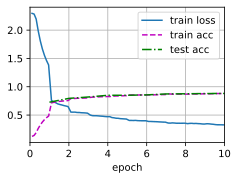

In [4]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.1.5. Tóm tắt
* AlexNet có cấu trúc tương tự như LeNet, nhưng sử dụng nhiều tầng tích chập hơn với không gian tham số lớn hơn để khớp tập dữ liệu ImageNet với kích thước lớn.
* Ngày nay AlexNet đã bị vượt qua bởi các kiến trúc hiệu quả hơn nhiều nhưng nó là một bước quan trọng để đi từ các mạng nông đến các mạng sâu được sử dụng ngày nay.
* Mặc dù có vẻ như chỉ tốn thêm một vài dòng trong mã nguồn của AlexNet so với LeNet, nhưng cộng đồng học thuật đã phải mất nhiều năm để đón nhận sự thay đổi khái niệm này và tận dụng những kết quả thực nghiệm tuyệt vời của nó. Một phần cũng do sự thiếu thốn của các công cụ tính toán hiệu quả.
* Dropout, ReLU và tiền xử lý là những bước quan trọng khác để đạt được kết quả xuất sắc trong các bài toán thị giác máy tính.

### 7.1.6. Bài tập
1. Thử tăng số lượng epoch và xem kết quả khác như thế nào so với LeNet? Tại sao lại có sự khác nhau như vậy?
2. AlexNet có thể là quá phức tạp đối với tập dữ liệu Fashion-MNIST. Vậy:
    * Hãy thử đơn giản hóa mô hình để làm cho việc huấn luyện trở nên nhanh hơn nhưng đồng thời vẫn đảm bảo độ chính xác không bị giảm đi đáng kể.
    * Hãy thử thiết kế một mô hình tốt hơn có thể hoạt động trực tiếp trên các ảnh có kích thước  $28×28$ .
3. Điều chỉnh kích thước batch và quan sát các thay đổi về độ chính xác và việc tiêu thụ bộ nhớ GPU.
4. Băng thông bộ nhớ hoạt động như thế nào khi tính toán các kết quả? Phần nào trong thiết kế của AlexNet có ảnh hưởng lớn đến:
    * Việc sử dụng bộ nhớ của mạng này?
    * Sự tính toán của mạng này?
5. Khi áp dụng dropout và ReLU cho LeNet5, độ chính xác của mô hình có được cải thiện hay không? Dữ liệu được tiền xử lý như thế nào?

## 7.2. Mạng sử dụng Khối (VGG)
Mặc dù AlexNet đã chứng minh rằng các mạng nơ-ron tích chập có thể đạt được kết quả tốt, nó lại không cung cấp một khuôn mẫu chung để định hướng nghiên cứu sau này trong việc thiết kế các mạng mới. Trong các phần tiếp theo, chúng tôi sẽ giới thiệu một số khái niệm dựa trên thực nghiệm được sử dụng rộng rãi khi thiết kế mạng học sâu.

Sự phát triển trong lĩnh vực này có nét tương đồng tiến triển trong ngành thiết kế vi xử lý, chuyển từ việc sắp đặt các bóng bán dẫn, đến các phần tử logic và các khối logic.
Tương tự như vậy, việc thiết kế kiến trúc các mạng nơ-ron đã phát triển theo hướng ngày một trừu tượng hơn. Điển hình là việc các nhà nghiên cứu đã thay đổi suy nghĩ từ quy mô các nơ-ron riêng lẻ sang các tầng, và giờ đây là các khối chứa các tầng lặp lại theo khuôn mẫu.
Ý tưởng sử dụng các khối lần đầu xuất hiện trong mạng VGG, được đặt theo tên của nhóm [VGG](http://www.robots.ox.ac.uk/~vgg/) thuộc Đại học Oxford. Sử dụng bất kỳ các framework học sâu hiện đại nào với vòng lặp và chương trình con để xây dựng các cấu trúc lặp lại này là tương đối dễ dàng.

### 7.2.1. Khối VGG
Khối cơ bản của mạng tích chập cổ điển là một chuỗi các tầng sau đây: (i) một tầng tích chập (với phần đệm để duy trì độ phân giải), (ii) một tầng phi tuyến như ReLU, (iii) một tầng gộp như tầng gộp cực đại. Một khối VGG gồm một chuỗi các tầng tích chập, tiếp nối bởi một tầng gộp cực đại để giảm chiều không gian. Trong bài báo gốc của VGG [Simonyan & Zisserman, 2014](https://d2l.aivivn.com/chapter_references/zreferences.html#simonyan-zisserman-2014), tác giả sử dụng tích chập với các hạt nhân  3×3  và tầng gộp cực đại  2×2  với sải bước bằng  2  (giảm một nửa độ phân giải sau mỗi khối). Trong mã nguồn dưới đây, ta định nghĩa một hàm tên `vgg_block` để tạo một khối VGG. Hàm này nhận hai đối số `num_convs` và `num_channels` tương ứng lần lượt với số tầng tích chập và số kênh đầu ra.

In [5]:
from d2l import torch as d2l
import torch
from torch import nn

def vgg_block(num_convs, in_channels, out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                               kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

### 7.2.2. Mạng VGG
Giống như AlexNet và LeNet, mạng VGG có thể được phân chia thành hai phần: phần đầu tiên bao gồm chủ yếu các tầng tích chập và tầng gộp, còn phần thứ hai bao gồm các tầng kết nối đầy đủ. Phần tích chập của mạng gồm các mô-đun `vgg_block` kết nối liên tiếp với nhau. Trong Fig. 7.2.1, biến `conv_arch` bao gồm một danh sách các tuples (một tuple cho mỗi khối), trong đó mỗi tuple chứa hai giá trị: số lượng tầng tích chập và số kênh đầu ra, cũng chính là những đối số cần thiết để gọi hàm `vgg_block`. Mô-đun kết nối đầy đủ giống hệt với mô-đun tương ứng trong AlexNet.

![](images/vgg.svg)

Mạng VGG gốc có 5 khối tích chập, trong đó hai khối đầu tiên bao gồm một tầng tích chập ở mỗi khối, ba khối còn lại chứa hai tầng tích chập ở mỗi khối. Khối đầu tiên có 64 kênh đầu ra, mỗi khối tiếp theo nhân đôi số kênh đầu ra cho tới khi đạt giá trị  512 . Vì mạng này sử dụng  8  tầng tích chập và  3  tầng kết nối đầy đủ nên nó thường được gọi là VGG-11.

In [6]:
conv_arch = ((1, 64), (1, 128), (1, 256), (2, 512), (2, 512))

Đoạn mã nguồn sau đây lập trình mạng VGG-11. Ở đây ta chỉ đơn thuần thực hiện vòng lặp `for` trên biến `conv_arch`.

In [7]:
def vgg(conv_arch):
    conv_blks=[]
    in_channels=1
    for (num_conv, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_conv, in_channels, out_channels))
        in_channels = out_channels
        
    return nn.Sequential(
    *conv_blks, nn.Flatten(),
    # The fully-connected part
    nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 10))

net = vgg(conv_arch)

Tiếp theo, chúng ta sẽ tạo một mẫu dữ liệu một kênh với chiều cao và chiều rộng là 224 để quan sát kích thước đầu ra của mỗi tầng.

In [8]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


Như bạn thấy, ta đã giảm chiều cao và chiều rộng đi một nửa sau mỗi khối, cuối cùng kích thước của các biễu diễn chỉ còn là 7 trên mỗi chiều trước khi được trải phẳng ra để tiếp tục xử lý trong tầng kết nối đầy đủ.

### 7.2.3. Huấn luyện Mô hình
Vì VGG-11 thực hiện nhiều tính toán hơn AlexNet, ta sẽ xây dựng một mạng với số kênh nhỏ hơn. Như vậy vẫn là quá đủ để huấn luyện trên bộ dữ liệu Fashion-MNIST.

In [9]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

Ngoại trừ việc sử dụng tốc độ học lớn hơn một chút, quy trình huấn luyện mô hình này tương tự như của AlexNet trong phần trước.

training on cuda:0


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 4.00 GiB total capacity; 2.41 GiB already allocated; 1.69 MiB free; 2.53 GiB reserved in total by PyTorch)
Exception raised from malloc at ..\c10\cuda\CUDACachingAllocator.cpp:272 (most recent call first):
00007FFC2E9175A200007FFC2E917540 c10.dll!c10::Error::Error [<unknown file> @ <unknown line number>]
00007FFC2E8B9C0600007FFC2E8B9B90 c10_cuda.dll!c10::CUDAOutOfMemoryError::CUDAOutOfMemoryError [<unknown file> @ <unknown line number>]
00007FFC2E8C069600007FFC2E8BF370 c10_cuda.dll!c10::cuda::CUDACachingAllocator::init [<unknown file> @ <unknown line number>]
00007FFC2E8C083A00007FFC2E8BF370 c10_cuda.dll!c10::cuda::CUDACachingAllocator::init [<unknown file> @ <unknown line number>]
00007FFC2E8B509900007FFC2E8B4EB0 c10_cuda.dll!c10::cuda::CUDAStream::unpack [<unknown file> @ <unknown line number>]
00007FFBF0071FF100007FFBF0071EB0 torch_cuda.dll!at::native::empty_cuda [<unknown file> @ <unknown line number>]
00007FFBF0188AFE00007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBF01842A500007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBE8181A3A00007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE818000500007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE82518A000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE82628DC00007FFBE8262850 torch_cpu.dll!at::empty [<unknown file> @ <unknown line number>]
00007FFBE8025C6100007FFBE8025780 torch_cpu.dll!at::native::empty_like [<unknown file> @ <unknown line number>]
00007FFBE83271C200007FFBE82AD060 torch_cpu.dll!at::zeros_out [<unknown file> @ <unknown line number>]
00007FFBE7DE21EE00007FFBE7DD6470 torch_cpu.dll!torch::nn::functional::BatchNormFuncOptions::~BatchNormFuncOptions [<unknown file> @ <unknown line number>]
00007FFBE824F44F00007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE8262C8200007FFBE8262C00 torch_cpu.dll!at::empty_like [<unknown file> @ <unknown line number>]
00007FFBE802A93800007FFBE802A840 torch_cpu.dll!at::native::zeros_like [<unknown file> @ <unknown line number>]
00007FFBE833F7D400007FFBE82AD060 torch_cpu.dll!at::zeros_out [<unknown file> @ <unknown line number>]
00007FFBE7DE21EE00007FFBE7DD6470 torch_cpu.dll!torch::nn::functional::BatchNormFuncOptions::~BatchNormFuncOptions [<unknown file> @ <unknown line number>]
00007FFBE824F44F00007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE82ACFF200007FFBE82ACF70 torch_cpu.dll!at::zeros_like [<unknown file> @ <unknown line number>]
00007FFBEF50D40800007FFBEF50D3B0 torch_cuda.dll!at::native::max_pool2d_with_indices_backward_cuda [<unknown file> @ <unknown line number>]
00007FFBF018EE5900007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBF0181FA100007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBE824E28000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE827A22500007FFBE827A140 torch_cpu.dll!at::max_pool2d_with_indices_backward [<unknown file> @ <unknown line number>]
00007FFBE95DB72700007FFBE94EE010 torch_cpu.dll!torch::autograd::GraphRoot::apply [<unknown file> @ <unknown line number>]
00007FFBE81C2C7100007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE824E28000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE827A22500007FFBE827A140 torch_cpu.dll!at::max_pool2d_with_indices_backward [<unknown file> @ <unknown line number>]
00007FFBE944CE0400007FFBE944CBD0 torch_cpu.dll!torch::autograd::generated::MaxPool2DWithIndicesBackward::apply [<unknown file> @ <unknown line number>]
00007FFBE9427E9100007FFBE9427B50 torch_cpu.dll!torch::autograd::Node::operator() [<unknown file> @ <unknown line number>]
00007FFBE998F9BA00007FFBE998F300 torch_cpu.dll!torch::autograd::Engine::add_thread_pool_task [<unknown file> @ <unknown line number>]
00007FFBE99903AD00007FFBE998FFD0 torch_cpu.dll!torch::autograd::Engine::evaluate_function [<unknown file> @ <unknown line number>]
00007FFBE9994FE200007FFBE9994CA0 torch_cpu.dll!torch::autograd::Engine::thread_main [<unknown file> @ <unknown line number>]
00007FFBE9994C4100007FFBE9994BC0 torch_cpu.dll!torch::autograd::Engine::thread_init [<unknown file> @ <unknown line number>]
00007FFBCEBB08F700007FFBCEB89F80 torch_python.dll!THPShortStorage_New [<unknown file> @ <unknown line number>]
00007FFBE998BF1400007FFBE998B780 torch_cpu.dll!torch::autograd::Engine::get_base_engine [<unknown file> @ <unknown line number>]
00007FFC8B8B10B200007FFC8B8B0F70 ucrtbase.dll!beginthreadex [<unknown file> @ <unknown line number>]
00007FFC8CEF7C2400007FFC8CEF7C10 KERNEL32.DLL!BaseThreadInitThunk [<unknown file> @ <unknown line number>]
00007FFC8DCECEA100007FFC8DCECE80 ntdll.dll!RtlUserThreadStart [<unknown file> @ <unknown line number>]


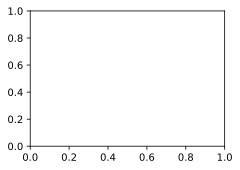

In [10]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.2.4. Tóm tắt
* Mạng VGG-11 được xây dựng bằng cách tái sử dụng các khối tích chập. Các mô hình VGG khác nhau có thể được định nghĩa bằng cách thay đổi số lượng các tầng tích chập và số kênh đầu ra ở mỗi khối.
* Việc sử dụng các khối giúp ta định nghĩa mạng bằng các đoạn mã nguồn ngắn gọn và thiết kế các mạng phức tạp một cách hiệu quả hơn.
* Thử nghiệm nhiều kiến trúc khác nhau, Simonyan và Zisserman đã phát hiện rằng mạng có cửa sổ tích chập hẹp (như  $3×3$ ) và nhiều tầng cho hiệu quả cao hơn mạng có cửa sổ tích chập rộng nhưng ít tầng.

### 7.2.5. Bài tập
1. Khi in ra kích thước của các tầng, chúng ta chỉ thấy 8 kết quả chứ không phải 11. Thông tin về 3 tầng còn lại nằm ở đâu?
2. So với AlexNet, VGG chậm hơn đáng kể về mặt tính toán và cũng đòi hỏi nhiều bộ nhớ GPU hơn. Hãy phân tích lý do cho hiện tượng này?
3. Thử thay đổi chiều cao vầ chiều rộng của các ảnh trong Fashion-MNIST từ 224 xuống 96. Điều này ảnh hưởng thế nào tới các thử nghiệm?
4. Tham khảo Bảng 1 trong [Simonyan & Zisserman, 2014] để xây dựng các mô hình thông dụng khác, ví dụ như là VGG-16 và VGG-19.

# 7.3. Mạng trong Mạng (Network in Network - NiN)
LeNet, AlexNet và VGG đều có chung một khuôn mẫu thiết kế: trích xuất các đặc trưng khai thác cấu trúc không gian thông qua một chuỗi các phép tích chập và các tầng gộp, sau đó hậu xử lý các biểu diễn thông qua các tầng kết nối đầy đủ. Những cải tiến so với LeNet của AlexNet và VGG chủ yếu nằm ở việc mở rộng và tăng chiều sâu hai mô-đun này. Một lựa chọn khác là ta có thể sử dụng các tầng kết nối đầy đủ ngay từ giai đoạn trước. Tuy nhiên, việc tùy tiện sử dụng các tầng kết nối dày đặc có thể làm mất đi cấu trúc không gian của biểu diễn. Dùng các khối của Mạng trong Mạng (Network in Network - NiN) là một giải pháp thay thế khác. Ý tưởng này được đề xuất trong [Lin et al., 2013](https://arxiv.org/abs/1312.4400) dựa trên một thay đổi rất đơn giản — sử dụng MLP trên các kênh cho từng điểm ảnh riêng biệt.

## 7.3.1. Khối NiN
Hãy nhớ lại rằng đầu vào và đầu ra của các tầng tích chập là các mảng bốn chiều với các trục tương ứng với batch, kênh, chiều cao và chiều rộng. Đầu vào và đầu ra của các tầng kết nối đầy đủ thường là các mảng hai chiều tương ứng với batch và các đặc trưng. Ý tưởng chính của NiN là áp dụng một tầng kết nối đầy đủ tại mỗi vị trí điểm ảnh (theo chiều cao và chiều rộng). Nếu trọng số tại mỗi vị trí không gian được chia sẻ với nhau, ta có thể coi đây là một tầng chập  1×1  (như được mô tả trong Section 6.4) hoặc như một tầng kết nối đầy đủ được áp dụng độc lập trên từng vị trí điểm ảnh. Nói theo một cách khác, ta có thể coi từng phần tử trong chiều không gian (chiều cao và chiều rộng) là tương đương với một mẫu và mỗi kênh tương đương với một đặc trưng. Fig. 7.3.1 minh họa sự khác biệt chính về cấu trúc giữa NiN và AlexNet, VGG cũng như các mạng khác.

![](images/nin.svg)
Fig. 7.3.1 Hình bên trái biểu diễn cấu trúc mạng của AlexNet và VGG, và hình bênh phải biểu diễn cấu trúc mạng của NiN

Khối NiN bao gồm một tầng tích chập theo sau bởi hai tầng tích chập  $1×1$  hoạt động như các tầng kết nối đầy đủ trên điểm ảnh và sau đó là hàm kích hoạt ReLU. Kích thước cửa sổ tích chập của tầng thứ nhất thường được định nghĩa bởi người dùng. Kích thước cửa sổ tích chập ở các tầng tiếp theo được cố định bằng  $1×1$ .

In [6]:
from d2l import torch as d2l
import torch
from torch import nn

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
    nn.ReLU(),
    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

### 7.3.2. Mô hình NiN
Cấu trúc mạng NiN gốc được đề xuất ngay sau và rõ ràng lấy cảm hứng từ mạng Alexnet. NiN sử dụng các tầng tích chập có kích thước cửa sổ  11×11 ,  5×5 ,  3×3 , và số lượng các kênh đầu ra tương ứng giống với AlexNet. Mỗi khối NiN theo sau bởi một tầng gộp cực đại với sải bước 2 và kích thước cửa sổ  3×3 .

Một điểm khác biệt đáng chú ý so với AlexNet là NiN tránh hoàn toàn việc sử dụng các kết nối dày đặc. Thay vào đó, mạng này sử dụng các khối NiN với số kênh đầu ra bằng với số lớp nhãn, theo sau bởi một tầng gộp trung bình *toàn cục*, tạo ra một vector [logit](https://en.wikipedia.org/wiki/Logit). Một lợi thế của thiết kế NiN là giảm được các tham số cần thiết của mô hình một cách đáng kể. Tuy nhiên, trong thực tế, cách thiết kế này đôi lúc đòi hỏi tăng thời gian huấn luyện mô hình.

In [8]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    # TRansform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

Chúng ta tạo một mẫu dữ liệu để kiểm tra kích thước đầu ra của từng khối.

In [9]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 7.3.3. Thu thập Dữ liệu và Huấn luyện
Như thường lệ, ta sẽ sử dụng Fashion-MNIST để huấn luyện mô hình. Quá trình huấn luyện NiN cũng tương tự như AlexNet và VGG, nhưng thường sử dụng tốc độ học lớn hơn.

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.3.4. Tóm tắt
* NiN sử dụng các khối được cấu thành từ một tầng tích chập thông thường và nhiều tầng tích chập  1×1 . Kỹ thuật này có thể dùng trong các khối tích chập để tăng tính phi tuyến trên điểm ảnh.
* NiN loại bỏ các tầng kết nối đầy đủ và thay thế chúng bằng phép gộp trung bình toàn cục (nghĩa là tính trung bình cộng từ tất cả các vị trí) sau khi giảm số lượng kênh xuống bằng với số lượng đầu ra mong muốn (ví dụ: 10 kênh cho Fashion-MNIST).
* Việc bỏ đi các các tầng dày đặc giúp làm giảm hiện tượng quá khớp. NiN có số lượng tham số ít hơn đáng kể.
* Thiết kế của NiN đã ảnh hưởng đến thiết kế của nhiều mạng nơ-ron tích chập sau này.

### 7.3.5. Bài tập
1. Điều chỉnh các siêu tham số để cải thiện độ chính xác phân loại.
2. Tại sao có hai tầng chập  1×1  trong khối NiN? Thử loại bỏ một trong số chúng, sau đó quan sát và phân tích các hiện tượng thực nghiệm.
3. Tính toán việc sử dụng tài nguyên của NiN với:
    * Số lượng tham số?
    * Số lượng phép tính?
    * Lượng bộ nhớ cần thiết trong quá trình huấn luyện?
    * Lượng bộ nhớ cần thiết trong quá trình dự đoán?
4. Các vấn đề nào sẽ nảy sinh khi giảm biểu diễn từ  384×5×5  xuống  10×5×5  trong một bước?

## 7.4. Mạng nối song song (GoogLeNet)
Vào năm 2014, bài báo khoa học [Szegedy et al., 2015](https://arxiv.org/abs/1409.4842) đã giành chiến thắng ở cuộc thi ImageNet, bằng việc đề xuất một cấu trúc kết hợp những điểm mạnh của mô hình NiN và mô hình chứa các khối lặp lại. Bài báo này tập trung giải quyết câu hỏi: kích thước nào của bộ lọc tích chập là tốt nhất. Suy cho cùng, các mạng phổ biến trước đây chọn kích thước bộ lọc từ nhỏ như  1×1  tới lớn như  11×11 . Một góc nhìn sâu sắc trong bài báo này là đôi khi việc kết hợp các bộ lọc có kích thước khác nhau có thể sẽ hiệu quả. Trong phần này, chúng tôi sẽ giới thiệu mô hình GoogLeNet, bằng việc trình bày một phiên bản đơn giản hơn một chút so với phiên bản gốc—bỏ qua một số tính năng đặc biệt trước đây được thêm vào nhằm ổn định quá trình huấn luyện nhưng hiện nay không cần thiết nữa do đã có các thuật toán huấn luyện tốt hơn.

### 7.4.1. Khối Inception
Khối tích chập cơ bản trong mô hình GoogLeNet được gọi là Inception, nhiều khả năng được đặt tên dựa theo câu nói “Chúng ta cần đi sâu hơn” (*“We Need To Go Deeper”*) trong bộ phim Inception, sau này đã tạo ra một trào lưu lan rộng trên internet.
![](images/inception.svg)
Fig. 7.4.1 Cấu trúc của khối Inception

Như mô tả ở hình trên, khối inception bao gồm bốn nhánh song song với nhau. Ba nhánh đầu sử dụng các tầng tích chập với kích thước cửa sổ trượt lần lượt là  $1×1$ ,  $3×3$ , và  $5×5$  để trích xuất thông tin từ các vùng không gian có kích thước khác nhau. Hai nhánh giữa thực hiện phép tích chập $ 1×1$  trên dữ liệu đầu vào để giảm số kênh đầu vào, từ đó giảm độ phức tạp của mô hình. Nhánh thứ tư sử dụng một tầng gộp cực đại kích thước  $3×3$ , theo sau là một tầng tích chập  $1×1$  để thay đổi số lượng kênh. Cả bốn nhánh sử dụng phần đệm phù hợp để đầu vào và đầu ra của khối có cùng chiều cao và chiều rộng. Cuối cùng, các đầu ra của mỗi nhánh sẽ được nối lại theo chiều kênh để tạo thành đầu ra của cả khối. Các tham số thường được tinh chỉnh của khối Inception là số lượng kênh đầu ra mỗi tầng.

In [19]:
from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F

class Inception(nn.Module):
    # `c1`--`c4` are the number of output channels for each path
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3
        # convolutional layer
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5
        # convolutional layer
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1
        # convolutional layer
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # Concatenate the outputs on the channel dimension
        return torch.cat((p1, p2, p3, p4), dim=1)

Để hiểu trực quan tại sao mạng này hoạt động tốt, hãy cùng tìm hiểu sự kết hợp của các bộ lọc. Chúng khám phá hình ảnh trên các vùng có kích thước khác nhau. Tức là những chi tiết ở những mức độ khác nhau sẽ được nhận diện một cách hiệu quả bằng các bộ lọc khác nhau. Đồng thời, chúng ta có thể phân bổ số lượng tham số khác nhau cho những vùng có phạm vi khác nhau (ví dụ: nhiều tham số hơn cho vùng phạm vi nhỏ nhưng không bỏ qua hoàn toàn vùng phạm vi lớn).

### 7.4.2. Mô hình GoogLeNet
Như trình bày ở Fig. 7.4.2, mô hình GoogLeNet sử dụng tổng cộng 9 khối inception và tầng gộp trung bình toàn cục xếp chồng lên nhau. Phép gộp cực đại giữa các khối inception có tác dụng làm giảm kích thước chiều. Phần đầu tiên của GoogleNet giống AlexNet và LeNet, có các khối xếp chồng lên nhau kế thừa từ thiết kế của VGG và phép gộp trung bình toàn cục giúp tránh phải sử dụng nhiều tầng kết nối đầy đủ liên tiếp ở cuối. Cấu trúc của mô hình được mô tả như dưới đây.

![](images/inception-full.svg)
Fig. 7.4.2 Mô hình GoogLeNet đầy đủ

Bây giờ chúng ta có thể lập trình GoogLeNet theo từng phần. Thành phần đầu tiên sử dụng một tầng tích chập đầu ra 64 kênh và cửa sổ trượt kích thước  $7×7$.

In [20]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                  nn.ReLU(),
                  nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

Thành phần thứ hai sử dụng hai tầng tích chập: tầng đầu tiên có đầu ra 64 kênh và cửa sổ  $1×1$ , tiếp theo là một tầng có cửa sổ  $3×3$  và số kênh đầu ra gấp ba lần số kênh đầu vào. Phần này giống với nhánh thứ hai trong khối Inception.

In [21]:
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                  nn.ReLU(),
                  nn.Conv2d(64, 192, kernel_size=3, padding=1),
                  nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

Thành phần thứ ba kết nối hai khối Inception hoàn chỉnh một cách tuần tự. Số kênh đầu ra của khối Inception đầu tiên là  $64+128+32+32=256$ , và tỉ lệ số kênh của bốn nhánh là  $64:128:32:32=2:4:1:1$ . Nhánh thứ hai và nhánh thứ ba của khối này ở tầng tích chập đầu tiên làm giảm số lượng kênh đầu vào với tỉ lệ lần lượt là  $96/192=1/2$  và  $16/192=1/12$ , sau đó kết nối với tầng tích chập thứ hai. Số kênh đầu ra của khối Inception thứ hai tăng lên tới  $128+192+96+64=480$ , và tỉ lệ số kênh của bốn nhánh là  $128:192:96:64=4:6:3:2 $. Tầng tích chập đầu tiên của nhánh thứ hai và thứ ba làm giảm số kênh đầu vào với tỉ lệ lần lượt là $ 128/256=1/2$  và  $32/256=1/8$ .

In [22]:
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

Thành phần thứ tư phức tạp hơn. Thành phần này kết nối năm khối Inception có số kênh đầu ra lần lượt là  $192+208+48+64=512$ ,  $160+224+64+64=512$ ,  $128+256+64+64=512$ ,  $112+288+64+64=528$ , và  $256+320+128+128=832$ . Số kênh được gán cho các nhánh tương tự như trong mô đun thứ ba: nhánh thứ hai với tầng tích chập  $3×3$  sẽ cho đầu ra với số kênh lớn nhất, tiếp theo là nhánh thứ nhất với tầng tích chập  $1×1$ , nhánh thứ ba với tầng tích chập  $5×5$ , cuối cùng là nhánh thứ tư với tầng gộp cực đại  $3×3$ . Đầu tiên, nhánh thứ hai và thứ ba sẽ làm giảm số lượng kênh theo một tỷ lệ nhất định. Tỷ lệ này sẽ hơi khác nhau trong các khối Inception khác nhau.

In [23]:
b4 = nn.Sequential (Inception(480, 192, (96, 208), (16, 48), 64),
                    Inception(512, 160, (112,224), (24, 64), 64),
                    Inception(512, 128, (128, 256), (24, 64), 64),
                    Inception(512, 112, (114, 288), (32, 64), 64),
                    Inception(528, 256, (160, 320), (32, 128), 128),
                    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

Thành phần thứ năm có hai khối Inception với số kênh đầu ra lần lượt là  $256+320+128+128=832$  và  $384+384+128+128=1024$ . Số lượng kênh được gán cho mỗi nhánh tương tự như trong mô-đun thứ ba và thứ tư, chỉ khác nhau ở giá trị cụ thể. Lưu ý rằng thành phần thứ năm được theo sau bởi tầng đầu ra. Thành phần này sử dụng tầng gộp trung bình toàn cục để giảm chiều cao và chiều rộng của mỗi kênh xuống còn 1, giống như trong mô hình NiN. Cuối cùng, chúng ta biến đổi đầu ra thành một mảng hai chiều, đưa vào một tầng kết nối đầy đủ với số đầu ra bằng số lượng lớp của nhãn.

In [24]:
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveMaxPool2d((1,1)),
                   nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

Mô hình GoogLeNet khá phức tạp về mặt tính toán, nên không dễ để thay đổi số lượng kênh giống như VGG. Để có thời gian huấn luyện hợp lý trên bộ dữ liệu Fashion-MNIST, chúng ta cần giảm chiều cao và chiều rộng của đầu vào từ 224 xuống 96. Điều này làm đơn giản hoá việc tính toán. Sự thay đổi ở kích thước đầu ra giữa các mô đun khác nhau được minh hoạ như dưới đây.

In [25]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


### 7.4.3. Thu thập Dữ liệu và Huấn luyện
Vẫn như trước, chúng ta sử dụng tập dữ liệu Fashion-MNIST để huấn luyện mô hình. Chúng ta chuyển đổi độ phân giải hình ảnh thành  96×96  điểm ảnh trước khi bắt đầu quá trình huấn luyện.

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.4.4. Tóm tắt
* Khối Inception tương đương với một mạng con với bốn nhánh. Nó trích xuất thông tin một cách song song thông qua các tầng tích chập với kích thước cửa sổ khác nhau và các tầng gộp cực đại.
* Phép tích chập  1×1  giảm số kênh ở mức độ điểm ảnh. Phép gộp cực đại giảm độ phân giải.
* Trong GoogLeNet, nhiều khối Inception với thiết kế khéo léo được nối với các tầng khác theo chuỗi. Tỷ lệ số kênh trong khối Inception được xác định dựa vào nhiều kết quả thử nghiệm trên tập dữ liệu ImageNet.
* Mô hình GoogLeNet, cũng như các phiên bản kế tiếp của nó, là một trong những mô hình hiệu quả nhất trên ImageNet, với độ chính xác tương tự trên tập kiểm tra nhưng độ phức tạp tính toán lại thấp hơn.

### 7.4.5. Bài tập
1. Có nhiều biến thể của mô hình GoogLeNet. Hãy thử lập trình và chạy chúng. Một số biến thể bao gồm:
    * Thêm vào một tầng chuẩn hoá theo batch [Ioffe & Szegedy, 2015](https://arxiv.org/abs/1502.03167), như đã được mô tả ở phần Section 7.5.
    * Chỉnh sửa khối Inception theo [Szegedy et al., 2016](https://arxiv.org/abs/1512.00567).
    * Sử dụng kỹ thuật “làm mượt nhãn” (label smoothing) để điều chuẩn mô hình [Szegedy et al., 2016](https://arxiv.org/abs/1512.00567).
    * Tích hợp nó vào kết nối phần dư [Szegedy et al., 2017](https://arxiv.org/abs/1602.07261), như mô tả trong phần sau Section 7.6.
2. Kích thước tối thiểu của hình ảnh với GoogLeNet là bao nhiêu?
3. So sánh số lượng tham số mô hình của AlexNet, VGG và NiN với GoogLeNet. NiN và GoogLeNet đã giảm được đáng kể số lượng tham số như thế nào?
4. Tại sao chúng ta cần tầng tích chập kích thước lớn ở đầu mạng?

# 7.5. Chuẩn hoá theo batch
Huấn luyện mạng nơ-ron sâu không hề đơn giản, để chúng hội tụ trong khoảng thời gian chấp nhận được là một câu hỏi khá hóc búa. Trong phần này, chúng ta giới thiệu chuẩn hóa theo batch (**Batch Normalization - BN**) [Ioffe & Szegedy, 2015](https://arxiv.org/abs/1502.03167), một kỹ thuật phổ biến và hiệu quả nhằm tăng tốc độ hội tụ của mạng học sâu một cách ổn định. Cùng với các khối phần dư (residual block) được đề cập ở Section 7.6 — BN giúp dễ dàng hơn trong việc huấn luyện mạng học sâu với hơn 100 tầng.

## 7.5.1. Huấn luyện mạng học sâu
Để thấy mục đích của việc chuẩn hóa theo batch, hãy cùng xem xét lại một vài vấn đề phát sinh trên thực tế khi huấn luyện các mô hình học máy và đặc biệt là mạng nơ-ron.

Những lựa chọn tiền xử lý dữ liệu khác nhau thường tạo nên sự khác biệt rất lớn trong kết quả cuối cùng. Hãy nhớ lại việc áp dụng perceptron đa tầng để dự đoán giá nhà (Section 4.10). Việc đầu tiên khi làm việc với dữ liệu thực tế là chuẩn hóa các đặc trưng đầu vào để chúng có giá trị trung bình bằng không và phương sai bằng một. Thông thường, việc chuẩn hóa này hoạt động tốt với các bộ tối ưu vì giá trị các tham số tiên nghiệm có cùng một khoảng tỷ lệ.
Khi huấn luyện các mạng thường gặp như Perceptron đa tầng hay CNN, các giá trị kích hoạt ở các tầng trung gian có thể nhận các giá trị với mức độ biến thiên lớn- dọc theo các tầng từ đầu vào đến đầu ra, qua các nút ở cùng một tầng, và theo thời gian do việc cập nhật giá trị tham số. Những nhà phát minh kỹ thuật chuẩn hoá theo batch cho rằng sự thay đổi trong phân phối của những giá trị kích hoạt có thể cản trở sự hội tụ của mạng. Dễ thấy rằng nếu một tầng có các giá trị kích hoạt lớn gấp 100 lần so với các tầng khác, thì cần phải có các điều chỉnh bổ trợ trong tốc độ học.
Mạng nhiều tầng có độ phức tạp cao và dễ gặp vấn đề quá khớp. Điều này cũng đồng nghĩa rằng kỹ thuật điều chuẩn càng trở nên quan trọng.
Chuẩn hoá theo batch được áp dụng cho từng tầng riêng lẻ (hoặc có thể cho tất cả các tầng) và hoạt động như sau: Trong mỗi vòng lặp huấn luyện, tại mỗi tầng, đầu tiên tính giá trị kích hoạt như thường lệ. Sau đó chuẩn hóa những giá trị kích hoạt của mỗi nút bằng việc trừ đi giá trị trung bình và chia cho độ lệch chuẩn. Cả hai đại lượng này được ước tính dựa trên số liệu thống kê của minibatch hiện tại. Chính vì chuẩn hóa dựa trên các số liệu thống kê của batch nên kỹ thuật này có tên gọi chuẩn hoá theo batch.

Lưu ý rằng, khi áp dụng BN với những minibatch có kích thước 1, mô hình sẽ không học được gì. Vì sau khi trừ đi giá trị trung bình, mỗi nút ẩn sẽ nhận giá trị  0 ! Dễ dàng suy luận ra là BN chỉ hoạt động hiệu quả và ổn định với kích thước minibatch đủ lớn. Cần ghi nhớ rằng, khi áp dụng BN là lựa chọn kích thước minibatch quan trọng hơn so với trường hợp không áp dụng BN.

BN chuyển đổi những giá trị kích hoạt tại tầng  $x$  nhất định theo công thức sau:

<center>$\mathrm{BN}(\mathbf{x}) = \mathbf{\gamma} \odot \frac{\mathbf{x} - \hat{\mathbf{\mu}}}{\hat\sigma} + \mathbf{\beta}$</center>

Ở đây,  $\hat{\mathbf{\mu}}$ là giá trị trung bình và  $\hat{\mathbf{\sigma}}$  là độ lệch chuẩn của các mẫu trong minibatch. Sau khi áp dụng BN, những giá trị kích hoạt của minibatch có giá trị trung bình bằng không và phương sai đơn vị. Vì việc lựa chọn phương sai đơn vị (so với một giá trị đặc biệt khác) là tuỳ ý, nên chúng ta thường thêm vào từng cặp tham số tương ứng là hệ số tỷ lệ  $γ$  và độ chệch  $β$ . Do đó, độ lớn giá trị kích hoạt ở những tầng trung gian không thể phân kỳ trong quá trình huấn luyện vì BN chủ động chuẩn hoá chúng theo giá trị trung bình và phương sai cho trước (thông qua  $μ$  và  $σ$ ). Qua trực giác và thực nghiệm, dùng BN có thể cho phép chọn tốc độ học nhanh hơn.

Ký hiệu một minibatch là  $\mathcal{B}$ , chúng ta tính $\hat{\mathbf{\mu}}_\mathcal{B}$ và $\hat\sigma_\mathcal{B}$ theo công thức sau:

<center>$\hat{\mathbf{\mu}}_\mathcal{B} \leftarrow \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x}
\text{ và }
\hat{\mathbf{\sigma}}_\mathcal{B}^2 \leftarrow \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} (\mathbf{x} - \mathbf{\mu}_{\mathcal{B}})^2 + \epsilon$</center>

Và đây là chủ đề thường xuất hiện trong học sâu. Vì những lý do vẫn chưa được giải thích rõ bằng lý thuyết, nhiều nguồn nhiễu khác nhau trong việc tối ưu hoá thường dẫn đến huấn luyện nhanh hơn và giảm quá khớp. Trong khi những nhà lý thuyết học máy truyền thống có thể bị vướng mắc ở việc định rõ điểm này, những thay đổi do nhiễu dường như hoạt động giống một dạng điều chuẩn. Trong một số nghiên cứu sơ bộ, [Teye et al., 2018](https://arxiv.org/abs/1802.06455) và [Luo et al., 2018](https://arxiv.org/abs/1809.00846) đã lần lượt chỉ ra các thuộc tính của BN liên quan tới tiên nghiệm Bayesian (*Bayesian prior*) và các lượng phạt (*penalty*). Cụ thể, nghiên cứu này làm sáng tỏ lý do BN hoạt động tốt nhất với các minibatch có kích cỡ vừa phải, trong khoảng 50 - 100.

Cố định một mô hình đã được huấn luyện, bạn có thể nghĩ rằng chúng ta nên sử dụng toàn bộ tập dữ liệu để ước tính giá trị trung bình và phương sai. Và đúng là như vậy. Bởi lẽ khi huấn luyện xong, tại sao ta lại muốn cùng một hình ảnh lại được phân loại khác nhau phụ thuộc vào batch chứa hình ảnh này? Trong quá trình huấn luyện, những tính toán chính xác như vậy không khả thi vì giá trị kích hoạt cho tất cả các điểm dữ liệu thay đổi mỗi khi cập nhật mô hình. Tuy nhiên, một khi mô hình đã được huấn luyện xong, chúng ta có thể tính được giá trị trung bình và phương sai của mỗi tầng dựa trên toàn bộ tập dữ liệu. Thực ra đây là tiêu chuẩn thực hành cho các mô hình sử dụng chuẩn hóa theo batch và do đó các tầng BN của MXNet hoạt động khác nhau giữa *chế độ huấn luyện* (chuẩn hoá bằng số liệu thống kê của minibatch) và *chế độ dự đoán* (chuẩn hoá bằng số liệu thống kê của toàn bộ tập dữ liệu)

Bây giờ chúng ta đã sẵn sàng để xem chuẩn hoá theo batch hoạt động thế nào trong thực tế.

### 7.5.2. Tầng chuẩn hoá theo batch
Thực hiện việc chuẩn hóa theo batch cho tầng kết nối đầy đủ và tầng tích chập hơi khác nhau một chút. Chúng ta sẽ thảo luận cả hai trường hợp trên. Nhớ rằng một khác biệt lớn của BN so với những tầng khác là vì BN cần số liệu thống kê trên toàn minibatch, chúng ta không thể bỏ qua kích thước batch như đã làm với các tầng khác.

#### 7.5.2.1. Tầng kết nối đầy đủ
Khi áp dụng BN cho tầng kết nối đầy đủ, ta thường chèn BN sau bước biến đổi affine và trước hàm kích hoạt phi tuyến. Kí hiệu đầu vào của tầng là  $x$ , hàm biến đổi tuyến tính là $f_{\theta}(\cdot)$ (với trọng số là  $θ$ ), hàm kích hoạt là $\phi(\cdot)$ , và phép tính BN là $\mathrm{BN}_{\mathbf{\beta}, \mathbf{\gamma}}$ với tham số $\mathbf{\beta}$ và $\mathbf{\gamma}$ , chúng ta sẽ biểu diễn việc tính toán tầng kết nối đầy đủ  $h$  khi chèn lớp BN vào như sau:

<center>$\mathbf{h} = \phi(\mathrm{BN}_{\mathbf{\beta}, \mathbf{\gamma}}(f_{\mathbf{\theta}}(\mathbf{x}) ) )$</center>
 
Nhắc lại rằng giá trị trung bình và phương sai sẽ được tính toán trên chính minibatch $\mathcal{B}$ mà sẽ được biến đổi. Cũng cần lưu ý rằng hệ số tỷ lệ $\mathbf{\gamma}$ và độ chệch $\mathbf{\beta}$ là những tham số cần được học cùng với bộ tham số quen thuộc $\mathbf{\theta}$.

#### 7.5.2.2. Tầng tích chập
Tương tự với tầng tích chập, chúng ta áp dụng BN sau phép tích chập và trước hàm kích hoạt phi tuyến. Khi áp dụng phép tích chập cho đầu ra nhiều kênh, chúng ta cần thực hiện chuẩn hóa theo batch cho mỗi đầu ra của những kênh này, và mỗi kênh sẽ có riêng cho nó các tham số tỉ lệ và độ chệch, cả hai đều là các số vô hướng. Giả sử các minibatch có kích thước  $m$ , đầu ra cho mỗi kênh của phép tích chập có chiều cao  $p$  và chiều rộng  $q$ . Với tầng tích chập, ta sẽ thực hiện mỗi phép chuẩn hoá theo batch trên  $m⋅p⋅q$  phần tử trên từng kênh đầu ra cùng lúc. Vì thế trên từng kênh, ta sử dụng giá trị trên tất cả các vị trí không gian để tính trung bình $\hat{\mathbf{\mu}}$ và phương sai $\hat{\mathbf{\sigma}}$ và sau đó dùng hai giá trị này để chuẩn hóa các giá trị tại mỗi vị trí không gian trên kênh đó.

#### 7.5.2.3. Chuẩn hoá theo Batch trong Quá trình Dự đoán
Như đã đề cập trước đó, BN thường hoạt động khác nhau trong chế độ huấn luyện và chế độ dự đoán. Thứ nhất, nhiễu trong  $μ$  và  $σ$  phát sinh từ việc chúng được xấp xỉ trên các minibatch không còn là nhiễu được mong muốn một khi ta đã huấn luyện xong mô hình. Thứ hai, trong nhiều trường hợp sẽ là xa xỉ khi tính toán các con số thống kê sau mỗi lần chuẩn hoá theo batch, ví dụ, khi cần áp dụng mô hình để đưa ra một kết quả dự đoán mỗi lần.

Thông thường, sau khi huấn luyện, chúng ta sử dụng toàn bộ tập dữ liệu để tính toán các con số thống kê của các giá trị kích hoạt và sau đó cố định chúng tại thời điểm dự đoán. Do đó, BN hoạt động khác nhau trong quá trình huấn luyện và kiểm tra. Lưu ý rằng dropout cũng có tính chất này.

### 7.5.3. Lập trình từ đầu
Dưới đây, chúng ta lập trình tầng chuẩn hoá theo batch chỉ dùng tensor.

In [1]:
from d2l import torch as d2l
import torch
from torch import nn

def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use `is_grad_enabled` to determine whether the current mode is training
    # mode or prediction mode
    if not torch.is_grad_enabled():
        # If it is prediction mode, directly use the mean and variance
        # obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully-connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of `X`, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used for the
        # standardization
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

Giờ ta có thể tạo một tầng BatchNorm đúng cách. Tầng này sẽ duy trì những tham số thích hợp tương ứng với tỉ lệ `gamma` và độ chệch `beta`, hai tham số này sẽ được cập nhật trong quá trình huấn luyện. Thêm vào đó, tầng BN sẽ duy trì giá trị trung bình động của trung bình và phương sai để sử dụng về sau khi ở chế độ dự đoán. Tham số `num_features` truyền vào `BatchNorm` là số đầu ra của tầng kết nối đầy đủ hoặc số kênh đầu ra của tầng tích chập. Tham số `num_dims` bằng 2 nếu là tầng kết nối đầy đủ và bằng 4 nếu là tầng tích chập.

Tạm để thuật toán sang một bên và tập trung vào khuôn mẫu thiết kế (design pattern) của việc lập trình. Thông thường, ta lập trình phần toán trong một hàm riêng biệt, ví dụ như `batch_norm`. Sau đó, ta tích hợp chức năng này vào một tầng tùy chỉnh, với mã nguồn chủ yếu giải quyết các vấn đề phụ trợ như di chuyển dữ liệu đến thiết bị phù hợp, cấp phát và khởi tạo biến, theo dõi các giá trị trung bình động (của trung bình và phương sai trong trường hợp này), v.v. Khuôn mẫu này giúp tách biệt việc tính toán khỏi các đoạn mã rập khuôn. Cũng lưu ý rằng để thuận tiện khi lập trình BN từ đầu, ta không tự động suy ra kích thước đầu vào, do đó ta cần chỉ định số lượng đặc trưng xuyên suốt. Tầng `BatchNorm` của framework sẽ hỗ trợ việc tự động này bằng khởi tạo trễ.

In [2]:
class BatchNorm(nn.Module):
    # `num_features`: the number of outputs for a fully-connected layer
    # or the number of output channels for a convolutional layer. `num_dims`:
    # 2 for a fully-connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.zeros(shape)

    def forward(self, X):
        # If `X` is not on the main memory, copy `moving_mean` and
        # `moving_var` to the device where `X` is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated `moving_mean` and `moving_var`
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

### 7.5.4. Sử dụng LeNet với Chuẩn hóa theo Batch
Để biết cách áp dụng `BatchNorm` trên thực tế, bên dưới ta áp dụng cho mô hình LeNet truyền thống (Section 6.6). Nhắc lại rằng BN thường được sử dụng sau tầng tích chập và tầng kết nối đầy đủ và trước hàm kích hoạt tương ứng.

In [3]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10))

Như thường lệ, ta sẽ huấn luyện trên bộ dữ liệu Fashion-MNIST. Đoạn mã này gần tương tự với đoạn mã khi lần đầu huấn luyện LeNet (Section 6.6). Điểm khác biệt chính là tốc độ học lớn hơn đáng kể.

loss 0.246, train acc 0.910, test acc 0.887
20730.3 examples/sec on cuda:0


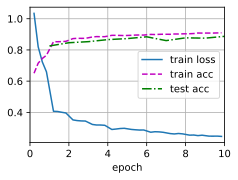

In [4]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

Chúng ta hãy xem tham số tỷ lệ gamma và tham số dịch chuyển beta đã học được tại tầng chuẩn hóa theo batch đầu tiên.

In [5]:
net[1].gamma.reshape((-1,)), net[1].beta.reshape((-1,))

(tensor([1.4448, 1.6436, 2.4278, 1.8660, 1.3844, 1.8761], device='cuda:0',
        grad_fn=<ViewBackward>),
 tensor([ 0.0331, -0.7287,  0.4034, -1.8670, -0.3436, -2.3102], device='cuda:0',
        grad_fn=<ViewBackward>))

### 7.5.5. Lập trình súc tích
So với lớp `BatchNorm` tự định nghĩa thì lớp `BatchNorm` định nghĩa trong nn của Gluon dễ sử dụng hơn. Trong framework, ta không cần chỉ rõ `num_features` và `num_dims`. Thay vào đó, các giá trị này sẽ được tự động suy ra trong quá trình khởi tạo trễ. Ngoại trừ điểm đó, đoạn mã trông giống hệt đoạn mã phía trên.

In [6]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84, 10))

Chúng ta sử dụng cùng các siêu tham số như trước để huấn luyện mô hình. Như thường lệ, biến thể dùng framework này chạy nhanh hơn nhiều vì được biên dịch thành C++/CUDA trong khi đoạn mã tùy chỉnh của chúng ta phải qua thông dịch bằng Python.

loss 0.248, train acc 0.908, test acc 0.852
34506.3 examples/sec on cuda:0


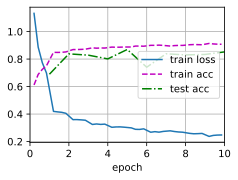

In [7]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.5.6. Tranh luận
Theo trực giác, chuẩn hóa theo batch được cho là làm cảnh quan tối ưu (optimization landscape) mượt mà hơn. Tuy nhiên, cần cẩn thận phân biệt giữa suy đoán theo trực giác và lời giải thích thực sự cho các hiện tượng quan sát thấy khi huấn luyện các mô hình học sâu. Hãy nhớ lại rằng ngay từ đầu ta thậm chí không rõ tại sao các mạng nơ-ron sâu đơn giản hơn (như Perceptron đa tầng và CNN truyền thống) lại có thể khái quát tốt như vậy. Ngay cả với dropout và điều chuẩn L2, chúng vẫn linh hoạt đến mức khả năng khái quát hóa trên dữ liệu chưa nhìn thấy của chúng không thể giải thích được bằng các điều kiện bảo đảm sự khái quát hóa trong lý thuyết học truyền thống.

Trong bài báo gốc khi đề xuất phương pháp chuẩn hóa theo batch, các tác giả ngoài việc giới thiệu một công cụ mạnh mẽ và hữu ích đã đưa ra lời giải thích lý do BN hoạt động tốt: bằng cách giảm sự dịch chuyển hiệp biến nội bộ - internal covariate shift. Có thể hiểu ý các tác giả về sự dịch chuyển hiệp biến nội bộ giống với cách giải thích ở trên-rằng phân phối của giá trị kích hoạt thay đổi trong quá trình huấn luyện. Tuy nhiên, có hai vấn đề với cách giải thích này: (1) Sự dịch chuyển phân phối này rất khác so với sự dịch chuyển hiệp biến, việc đặt tên như vậy có sự nhầm lẫn. (2) Cách giải thích này vẫn chưa đủ cụ thể và chặt chẽ, vẫn để ngỏ câu hỏi: chính xác thì tại sao kỹ thuật này hoạt động? Xuyên suốt cuốn sách này, chúng tôi hướng đến việc truyền đạt những kinh nghiệm thực tế để xây dựng các mạng nơ-ron sâu. Tuy nhiên, chúng tôi tin rằng cần phân biệt rõ những kinh nghiệm dựa trên trực giác này với những bằng chứng khoa học rõ ràng. Cuối cùng, khi đã thành thạo tài liệu này và bắt đầu viết các nghiên cứu của riêng mình, bạn cần phân biệt rõ ràng giữa khẳng định và linh cảm.

Nối tiếp thành công của BN, cách giải thích của kỹ thuật này thông qua khái niệm *sự dịch chuyển hiệp biến nội bộ* liên tục xuất hiện trong các tranh luận, các tài liệu kỹ thuật và trên các diễn đàn về cách trình bày nghiên cứu học máy. Trong một bài phát biểu đáng nhớ được đưa ra khi nhận giải thưởng **Test of Time Award** tại hội nghị NeurIPS 2017, Ali Rahimi đã sử dụng sự dịch chuyển hiệp biến nội bộ như một tiêu điểm trong một cuộc tranh luận so sánh thực hành học sâu hiện đại với thuật giả kim. Sau đó, cách giải thích này đã được xem xét lại một cách chi tiết trong một bài báo về các xu hướng đáng lo ngại trong học máy [Lipton & Steinhardt, 2018](https://arxiv.org/abs/1807.03341). Trong các tài liệu kỹ thuật, các tác giả khác ([Santurkar et al., 2018](https://par.nsf.gov/servlets/purl/10095935)) đã đề xuất các giải thích thay thế cho sự thành công của BN, dù phần nào đó trái ngược với cách giải thích trong bài báo gốc.

Chúng tôi lưu ý rằng *sự dịch chuyển hiệp biến nội* bộ không đáng bị chỉ trích, có hàng ngàn lập luận mơ hồ được đưa ra mỗi năm trong nhiều tài liệu kỹ thuật về học máy. Việc nó trở thành tâm điểm của những cuộc tranh luận rất có thể là do sự phổ biến của nó trong cộng đồng học máy. Chuẩn hóa theo batch là một phương pháp quan trọng, được áp dụng trong gần như tất cả các bộ phân loại hình ảnh đã được triển khai, mang lại hàng chục ngàn trích dẫn cho bài báo giới thiệu kĩ thuật này.

### 7.5.7. Tóm tắt
* Trong quá trình huấn luyện mô hình, chuẩn hóa theo batch liên tục điều chỉnh đầu ra trung gian của mạng nơ-ron theo giá trị trung bình và độ lệch chuẩn của minibatch, giúp các giá trị này ổn định hơn.
* Chuẩn hóa theo batch có chút khác biệt khi áp dụng cho tầng kết nối đầy đủ và tầng tích chập.
* Giống như tầng dropout, tầng chuẩn hóa theo batch sẽ tính ra kết quả khác nhau trong chế độ huấn luyện và chế độ dự đoán.
* Chuẩn hóa theo batch có nhiều tác dụng phụ có lợi, chủ yếu là về điều chuẩn. Tuy nhiên, cách giải thích ban đầu về việc giảm sự dịch chuyển hiệp biến dường như không hợp lý.

### 7.5.8. Bài tập
1. Trước khi chuẩn hóa theo batch, có thể loại bỏ phép biến đổi affine trong tầng kết nối đầy đủ hoặc tham số độ chệch trong phép tích chập không?
    * Tìm một phép biến đổi tương đương được áp dụng trước tầng kết nối đầy đủ.
    * Sự cải tiến này có hiệu quả không, tại sao?
2. So sánh tốc độ học của LeNet khi có sử dụng và không sử dụng chuẩn hóa theo batch.
    * Vẽ đồ thị biểu diễn sự giảm xuống của lỗi huấn luyện và lỗi kiểm tra.
    * Về miền hội tụ thì sao? Có thể chọn tốc độ học lớn tới đâu?
3. Chúng ta có cần chuẩn hóa theo batch trong tất cả các tầng không? Hãy thử nghiệm điều này.
4. Có thể thay thế Dropout bằng BN không? Sẽ có thay đổi như thế nào?
5. Giữ nguyên các hệ số `beta` và `gamma` rồi quan sát và phân tích kết quả.
6. Đọc tài liệu của Gluon về BatchNorm để xem các ứng dụng khác của chuẩn hóa theo batch.
7. Ý tưởng nghiên cứu: nghĩ về các phép biến đổi chuẩn hóa khác có thể áp dụng. Bạn có thể áp dụng biến đổi tích phân xác suất (*probability integral transform*) không? Còn ước lượng ma trận hiệp phương sai hạng tối đa thì sao?

# 7.6. Mạng phần dư (ResNet)
Khi thiết kế các mạng ngày càng sâu, ta cần hiểu việc thêm các tầng sẽ tăng độ phức tạp và khả năng biểu diễn của mạng như thế nào. Quan trọng hơn là khả năng thiết kế các mạng trong đó việc thêm các tầng vào mạng chắc chắn sẽ làm tăng tính biểu diễn thay vì chỉ tạo ra một chút khác biệt. Để làm được điều này, chúng ta cần một chút lý thuyết.

### 7.6.1. Các Lớp Hàm Số¶
Coi $\mathcal{F}$ là một lớp các hàm mà một kiến trúc mạng cụ thể (cùng với tốc độ học và các siêu tham số khác) có thể đạt được. Nói cách khác, với mọi hàm số  $f \in \mathcal{F}$, luôn tồn tại một số tập tham số  $W$  có thể tìm được bằng việc huấn luyện trên một tập dữ liệu phù hợp. Giả sử  $f∗$  là hàm cần tìm. Sẽ rất thuận lợi nếu hàm này thuộc tập  $\mathcal{F}$ , nhưng thường không may mắn như vậy. Thay vào đó, ta sẽ cố gắng tìm các hàm số  $f^*_\mathcal{F}$  tốt nhất có thể trong tập  $\mathcal{F}$ .
Ví dụ, có thể thử tìm $f^*_\mathcal{F}$  bằng cách giải bài toán tối ưu sau:

<center>$f^*_\mathcal{F} := \mathop{\mathrm{argmin}}_f L(X, Y, f)$ đối tượng thoảnmãn $f \in \mathcal{F}$</center>.
 
Khá hợp lý khi giả sử rằng nếu thiết kế một kiến trúc khác  $\mathcal{F}'$  mạnh mẽ hơn thì sẽ đạt được kết quả tốt hơn. Nói cách khác, ta kỳ vọng hàm số  $f^*_{\mathcal{F}'}$  sẽ “tốt hơn”  $f^*_{\mathcal{F}}$ . Tuy nhiên, nếu  $\mathcal{F} \not\subseteq \mathcal{F}'$ , thì không khẳng định được  $f^*_{\mathcal{F}'}$  “tốt hơn”  $f^*_{\mathcal{F}}$ . Trên thực tế,  $f^*_{\mathcal{F}'}$  có thể còn tệ hơn. Và đây là trường hợp thường xuyên xảy ra — việc thêm các tầng không phải lúc nào cũng tăng tính biểu diễn của mạng mà đôi khi còn tạo ra những thay đổi rất khó lường. Fig. 7.6.1 minh hoạ rõ hơn điều này.

![](images/functionclasses.svg)

Fig. 7.6.1 Hình trái: Các lớp hàm số tổng quát. Khoảng cách đến hàm cần tìm  $f∗$  (ngôi sao), trên thực tế có thể tăng khi độ phức tạp tăng lên. Hình phải: với các lớp hàm số lồng nhau, điều này không xảy ra.

Chỉ khi các lớp hàm lớn hơn chứa các lớp nhỏ hơn, thì mới đảm bảo rằng việc tăng thêm các tầng sẽ tăng khả năng biểu diễn của mạng. Đây là câu hỏi mà He và các cộng sự đã suy nghĩ khi nghiên cứu các mô hình thị giác sâu năm 2016. Ý tưởng trọng tâm của ResNet là mỗi tầng được thêm vào nên có một thành phần là hàm số đồng nhất. Điều này có nghĩa rằng, nếu ta huấn luyện tầng mới được thêm vào thành một ánh xạ đồng nhất  f(x)=x , thì mô hình mới sẽ hiệu quả ít nhất bằng mô hình ban đầu. Vì tầng được thêm vào có thể khớp dữ liệu huấn luyện tốt hơn, dẫn đến sai số huấn luyện cũng nhỏ hơn. Tốt hơn nữa, hàm số đồng nhất nên là hàm đơn giản nhất trong một tầng thay vì hàm null  f(x)=0 .

Cách suy nghĩ này khá trừu tượng nhưng lại dẫn đến một lời giải đơn giản đáng ngạc nhiên, một khối phần dư (residual block). Với ý tưởng này, [He et al., 2016a](https://www.cv-foundation.org/openaccess/content_cvpr_2016/html/He_Deep_Residual_Learning_CVPR_2016_paper.html) đã chiến thắng cuộc thi Nhận dạng Ảnh ImageNet năm 2015. Thiết kế này có ảnh hưởng sâu sắc tới việc xây dựng các mạng nơ-ron sâu.

### 7.6.2. Khối phần dư
Bây giờ, hãy tập trung vào mạng nơ-ron dưới đây. Ký hiệu đầu vào là  $x$ . Giả sử ánh xạ lý tưởng muốn học được là  $f(x)$ , và được dùng làm đầu vào của hàm kích hoạt. Phần nằm trong viền nét đứt bên trái phải khớp trực tiếp với ánh xạ  $f(x)$ . Điều này có thể không đơn giản nếu chúng ta không cần khối đó và muốn giữ lại đầu vào  $x$ . Khi đó, phần nằm trong viền nét đứt bên phải chỉ cần tham số hoá độ lệch khỏi giá trị  $x$ , bởi vì ta đã trả về  $x+f(x)$ . Trên thực tế, ánh xạ phần dư thường dễ tối ưu hơn, vì chỉ cần đặt  $f(x)=0$ . Nửa bên phải Fig. 7.6.2 mô tả khối phần dư cơ bản của ResNet. Về sau, những kiến trúc tương tự đã được đề xuất cho các mô hình chuỗi (*sequence model*), sẽ đề cập ở chương sau.

![](images/residual-block.svg)

Fig. 7.6.2 Sự khác biệt giữa một khối thông thường (trái) và một khối phần dư (phải). Trong khối phần dư, ta có thể nối tắt các tích chập.

ResNet có thiết kế tầng tích chập  $3×3$  giống VGG. Khối phần dư có hai tầng tích chập  $3×3$  với cùng số kênh đầu ra. Mỗi tầng tích chập được theo sau bởi một tầng chuẩn hóa theo batch và một hàm kích hoạt ReLU. Ta đưa đầu vào qua khối phần dư rồi cộng với chính nó trước hàm kích hoạt ReLU cuối cùng. Thiết kế này đòi hỏi đầu ra của hai tầng tích chập phải có cùng kích thước với đầu vào, để có thể cộng lại với nhau. Nếu muốn thay đổi số lượng kênh hoặc sải bước trong khối phần dư, cần thêm một tầng tích chập  $1×1$  để thay đổi kích thước đầu vào tương ứng ở nhánh ngoài. Hãy cùng xem đoạn mã bên dưới.

In [1]:
from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F

class Residual(nn.Module):  #@save
    """The Residual block of ResNet."""
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

Đoạn mã này tạo ra hai loại mạng: một loại cộng đầu vào vào đầu ra trước khi áp dụng hàm phi tuyến ReLU (khi `use_1x1conv=True`), còn ở loại thứ hai chúng ta thay đổi số kênh và độ phân giải bằng một tầng tích chập  $1×1$  trước khi thực hiện phép cộng. Fig. 7.6.3 minh họa điều này

![](images/resnet-block.svg)

Fig. 7.6.3 Trái: khối ResNet thông thường; Phải: Khối ResNet với tầng tích chập 1x1

Giờ hãy xem xét tình huống khi cả đầu vào và đầu ra có cùng kích thước.

In [2]:
blk = Residual(3,3)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
Y.shape

torch.Size([4, 3, 6, 6])

Chúng ta cũng có thể giảm một nửa kích thước chiều cao và chiều rộng của đầu ra trong khi tăng số kênh.

In [3]:
blk = Residual(3,6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

### 7.6.3. Mô hình ResNet
Hai tầng đầu tiên của ResNet giống hai tầng đầu tiên của GoogLeNet: tầng tích chập  $7×7$  với 64 kênh đầu ra và sải bước 2, theo sau bởi tầng gộp cực đại  $3×3$  với sải bước 2. Sự khác biệt là trong ResNet, mỗi tầng tích chập theo sau bởi tầng chuẩn hóa theo batch.

In [4]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

GoogLeNet sử dụng bốn mô-đun được tạo thành từ các khối Inception. ResNet sử dụng bốn mô-đun được tạo thành từ các khối phần dư có cùng số kênh đầu ra. Mô-đun đầu tiên có số kênh bằng số kênh đầu vào. Vì trước đó đã sử dụng tầng gộp cực đại với sải bước 2, nên không cần phải giảm chiều cao và chiều rộng ở mô-đun này. Trong các mô-đun sau, khối phần dư đầu tiên nhân đôi số kênh, đồng thời giảm một nửa chiều cao và chiều rộng.

Bây giờ ta sẽ lập trình mô-đun này. Chú ý rằng mô-đun đầu tiên được xử lý khác một chút.

In [5]:
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

Sau đó, chúng ta thêm các khối phần dư vào ResNet. Ở đây, mỗi mô-đun có hai khối phần dư.

In [6]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

Cuối cùng, giống như GoogLeNet, ta thêm một tầng gộp trung bình toàn cục và một tầng kết nối đầy đủ.

In [7]:
net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 10))

Có 4 tầng tích chập trong mỗi mô-đun (không tính tầng tích chập  1×1 ). Cộng thêm tầng tích chập đầu tiên và tầng kết nối đầy đủ cuối cùng, mô hình có tổng cộng 18 tầng. Do đó, mô hình này thường được gọi là ResNet-18. Có thể thay đổi số kênh và các khối phần dư trong mô-đun để tạo ra các mô hình ResNet khác nhau, ví dụ mô hình 152 tầng của ResNet-152. Mặc dù có kiến trúc lõi tương tự như GoogLeNet, cấu trúc của ResNet đơn giản và dễ sửa đổi hơn. Tất cả các yếu tố này dẫn đến sự phổ cập nhanh chóng và rộng rãi của ResNet. Fig. 7.6.4 là sơ đồ đầy đủ của ResNet-18.

![](images/ResNetFull.svg)

Trước khi huấn luyện, hãy quan sát thay đổi của kích thước đầu vào qua các mô-đun khác nhau trong ResNet. Như trong tất cả các kiến trúc trước, độ phân giải giảm trong khi số lượng kênh tăng đến khi tầng gộp trung bình toàn cục tổng hợp tất cả các đặc trưng.

In [8]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


### 7.6.4. Thu thập dữ liệu và Huấn luyện
Giống như các phần trước, chúng ta huấn luyện ResNet trên bộ dữ liệu Fashion-MNIST. Thay đổi duy nhất là giảm tốc độ học lại do kiến trúc mạng phức tạp hơn.

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.6.5. Tóm tắt
* Khối phần dư cho phép tham số hóa đến hàm đồng nhất  $f(x)=x$ .
* Thêm các khối phần dư làm tăng độ phức tạp của hàm số theo một cách chủ đích.
* Chúng ta có thể huấn luyện hiệu quả mạng nơ-ron sâu nhờ khối phần dư chuyển dữ liệu liên tầng.
* ResNet có ảnh hưởng lớn đến thiết kế sau này của các mạng nơ-ron sâu, cả tích chập và tuần tự.

### 7.6.6. Bài tập
1. Tham khảo Bảng 1 trong [He et al., 2016a](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) để lập trình các biến thể khác nhau.
2. Đối với các mạng sâu hơn, ResNet giới thiệu kiến trúc “thắt cổ chai” để giảm độ phức tạp của mô hình. Hãy thử lập trình kiến trúc đó.
3. Trong các phiên bản sau của ResNet, tác giả đã thay đổi kiến trúc “tích chập, chuẩn hóa theo batch, và hàm kích hoạt” thành “chuẩn hóa theo batch, hàm kích hoạt, và tích chập”. Hãy tự lập trình kiến trúc này. Xem hình 1 trong [He et al., 2016b](https://arxiv.org/abs/1603.05027) để biết chi tiết.
4. Chứng minh rằng nếu  x  được tạo ra bởi ReLU thì khối ResNet sẽ bao gồm hàm số đồng nhất.
5. Tại sao không thể tăng không giới hạn độ phức tạp của các hàm số, ngay cả với các lớp hàm lồng nhau?

# 7.7. Mạng Tích chập Kết nối Dày đặc (DenseNet)
ResNet đã làm thay đổi đáng kể quan điểm về cách tham số hóa các hàm số trong mạng nơ-ron sâu. Ở một mức độ nào đó, DenseNet có thể được coi là phiên bản mở rộng hợp lý của ResNet. Để hiểu cách đi đến kết luận đó, ta cần tìm hiểu một chút lý thuyết. Nhắc lại công thức khai triển Taylor cho hàm một biến vô hướng như sau

<center>$f(x) = f(0) + f'(x) x + \frac{1}{2} f''(x) x^2 + \frac{1}{6} f'''(x) x^3 + o(x^3).$</center>

### 7.7.1. Phân tách Hàm số
Điểm mấu chốt là khai triển Taylor phân tách hàm số thành các số hạng có bậc tăng dần. Tương tự, ResNet phân tách các hàm số thành

<center>$f(x)=x+g(x)$</center>
 
Cụ thể, ResNet tách hàm số  $f$  thành một số hạng tuyến tính đơn giản và một số hạng phi tuyến phức tạp hơn. Nếu ta muốn tách ra thành nhiều hơn hai số hạng thì sao? Một giải pháp đã được đề xuất bởi [Huang et al., 2017](https://arxiv.org/abs/1608.06993) trong kiến trúc DenseNet. Kiến trúc này đạt được hiệu suất kỉ lục trên tập dữ liệu ImageNet.

![](images/densenet-block.svg)

Fig. 7.7.1 Sự khác biệt chính giữa ResNet (bên trái) và DenseNet (bên phải) trong các kết nối xuyên tầng: sử dụng phép cộng và sử dụng phép nối.

Như được thể hiện trong Fig. 7.7.1, điểm khác biệt chính là DenseNet nối đầu ra lại với nhau thay vì cộng lại như ở ResNet. Kết quả là ta thực hiện một ánh xạ từ  x  đến các giá trị của nó sau khi áp dụng một chuỗi các hàm với độ phức tạp tăng dần.

<center>$x→[x,f1(x),f2(x,f1(x)),f3(x,f1(x),f2(x,f1(x)),…]$</center>
 
Cuối cùng, tất cả các hàm số này sẽ được kết hợp trong một Perceptron đa tầng để giảm số lượng đặc trưng một lần nữa. Lập trình thay đổi này khá đơn giản — thay vì cộng các số hạng với nhau, ta sẽ nối chúng lại. Cái tên DenseNet phát sinh từ việc đồ thị phụ thuộc giữa các biến trở nên khá dày đặc. Tầng cuối cùng của một chuỗi như vậy được kết nối “dày đặc” tới tất cả các tầng trước đó. Thành phần chính của DenseNet là các khối dày đặc và các tầng chuyển tiếp. Các khối dày đặc định nghĩa cách các đầu vào và đầu ra được nối với nhau, trong khi các tầng chuyển tiếp kiểm soát số lượng kênh sao cho nó không quá lớn. Các kết nối dày đặc được biểu diễn trong Fig. 7.7.2.

![](images/densenet.svg)

Fig. 7.7.2 Các kết nối dày đặc trong DenseNet

### 7.7.2. Khối Dày Đặc
DenseNet sử dụng kiến trúc “chuẩn hóa theo batch, hàm kích hoạt và phép tích chập” đã qua sửa đổi của ResNet (xem phần bài tập trong Section 7.6). Đầu tiên, ta sẽ lập trình kiến trúc này trong hàm `conv_block`.

In [9]:
from d2l import torch as d2l
import torch
from torch import nn

def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1))

Một khối dày đặc bao gồm nhiều khối `conv_block` với cùng số lượng kênh đầu ra. Tuy nhiên, ta sẽ nối đầu vào và đầu ra của từng khối theo chiều kênh khi tính toán lượt truyền xuôi.

In [10]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(
                num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate the input and output of each block on the channel
            # dimension
            X = torch.cat((X, Y), dim=1)
        return X

Trong ví dụ sau, ta sẽ định nghĩa một khối dày đặc gồm hai khối tích chập với 10 kênh đầu ra. Với một đầu vào gồm 3 kênh, ta sẽ nhận được một đầu ra với  $3+2×10=23$  kênh. Số lượng kênh của khối tích chập kiểm soát sự gia tăng của số lượng kênh đầu ra so với số lượng kênh đầu vào. Số lượng kênh này còn được gọi là tốc độ tăng trưởng (*growth rate*).

In [11]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

### 7.7.3. Tầng Chuyển Tiếp
Mỗi khối dày đặc sẽ làm tăng thêm số lượng kênh. Nhưng việc thêm quá nhiều kênh sẽ tạo nên một mô hình phức tạp quá mức. Do đó, một tầng chuyển tiếp sẽ được sử dụng để kiểm soát độ phức tạp của mô hình. Tầng này dùng một tầng tích chập  1×1  để giảm số lượng kênh, theo sau là một tầng gộp trung bình với sải bước bằng 2 để giảm một nửa chiều cao và chiều rộng, từ đó giảm độ phức tạp của mô hình hơn nữa.

In [12]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

Ta sẽ áp dụng một tầng chuyển tiếp với 10 kênh lên đầu ra của khối dày đặc trong ví dụ trước. Việc này sẽ làm giảm số lượng kênh đầu ra xuống còn 10, đồng thời làm giảm đi một nửa chiều cao và chiều rộng.

In [13]:
blk = transition_block(23, 10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

### 7.7.4. Mô hình DenseNet
Tiếp theo, ta sẽ xây dựng một mô hình DenseNet. Đầu tiên, DenseNet sử dụng một tầng tích chập và một tầng gộp cực đại như trong ResNet.

In [15]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

Sau đó, tương tự như cách ResNet sử dụng bốn khối phần dư, DenseNet cũng dùng bốn khối dày đặc. Và cũng giống như ResNet, ta có thể tùy chỉnh số lượng tầng tích chập được sử dụng trong mỗi khối dày đặc. Ở đây, ta sẽ đặt số lượng khối tích chập bằng 4 để giống với kiến trúc ResNet-18 trong phần trước. Ngoài ra, ta đặt số lượng kênh (tức tốc độ tăng trưởng) của các tầng tích chập trong khối dày đặc là 32, vì vậy 128 kênh sẽ được thêm vào trong mỗi khối dày đặc.

Trong ResNet, chiều cao và chiều rộng được giảm sau mỗi khối bằng cách sử dụng một khối phần dư với sải bước bằng 2. Ở đây, ta sẽ sử dụng tầng chuyển tiếp để làm giảm đi một nửa chiều cao, chiều rộng và số kênh.

In [16]:
# `num_channels`: the current number of channels
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    # This is the number of output channels in the previous dense block
    num_channels += num_convs * growth_rate
    # A transition layer that haves the number of channels is added between
    # the dense blocks
    if i != len(num_convs_in_dense_blocks) - 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2

Tương tự như ResNet, một tầng gộp toàn cục và một tầng kết nối đầy đủ sẽ được thêm vào cuối mạng để tính toán đầu ra.

In [17]:
net = nn.Sequential(
    b1, *blks,
    nn.BatchNorm2d(num_channels), nn.ReLU(),
    nn.AdaptiveMaxPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(num_channels, 10))

### 7.7.5. Thu thập dữ liệu và Huấn luyện
Trong phần này, vì đang sử dụng một mạng sâu hơn nên để đơn giản hóa việc tính toán, ta sẽ giảm chiều cao và chiều rộng của đầu vào từ 224 xuống còn 96.

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.7.6. Tóm tắt
* Về mặt kết nối xuyên tầng, không giống như trong ResNet khi đầu vào và đầu ra được cộng lại với nhau, DenseNet nối các đầu vào và đầu ra theo chiều kênh.
* Các thành phần chính tạo nên DenseNet là các khối dày đặc và các tầng chuyển tiếp.
* Ta cần kiểm soát kích thước của các chiều khi thiết kế mạng bằng cách thêm các tầng chuyển tiếp để làm giảm số lượng kênh.

### 7.7.7. Bài tập
1. Tại sao ta lại sử dụng phép gộp trung bình thay vì gộp cực đại trong tầng chuyển tiếp?
2. Một trong những ưu điểm được đề cập trong bài báo DenseNet là kiến trúc này có số lượng tham số nhỏ hơn so với ResNet. Tại sao lại như vậy?
3. DenseNet thường bị chỉ trích vì nó tiêu tốn nhiều bộ nhớ.
    * Điều này có đúng không? Hãy thử thay đổi kích thước đầu vào thành  224×224  để xem mức tiêu thụ bộ nhớ (GPU) thực tế.
    * Hãy tìm các phương án khác để giảm mức tiêu thụ bộ nhớ. Ta cần thay đổi kiến trúc này như thế nào?
4. Lập trình các phiên bản DenseNet khác nhau được trình bày trong Bảng 1 của [Huang et al., 2017](https://arxiv.org/abs/1608.06993).
5. Tại sao ta không cần nối các số hạng nếu ta chỉ quan tâm đến  x  và  f(x)  như trong ResNet? Tại sao ta lại cần làm vậy với nhiều hơn hai tầng trong DenseNet?
6. Thiết kế một mạng kết nối đầy đủ tương tự như DenseNet và áp dụng nó vào bài toán Dự đoán Giá Nhà.